## Part1: EDA 진행하기

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv('../input/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

총 12개의 columns가 존재하고 제가 이해한 각각의 의미는 다음과 같습니다. 
- 'PassengerId' : 승객의 ID
- 'Survived' : 생존 유무
- 'Pclass' : 티켓 번호
- 'Name' : 이름
- 'Sex' : 성별
- 'Age' : 나이
- 'SibSp' : 형제, 배우자 수
- 'Parch' : 부모, 자녀 수
- 'Ticket' : 티켓 번호
- 'Fare' : 요금
- 'Cabin' : 객실 번호
- 'Embarked' : 어디서 탔는지??

### 얼마나 살아남았을까??

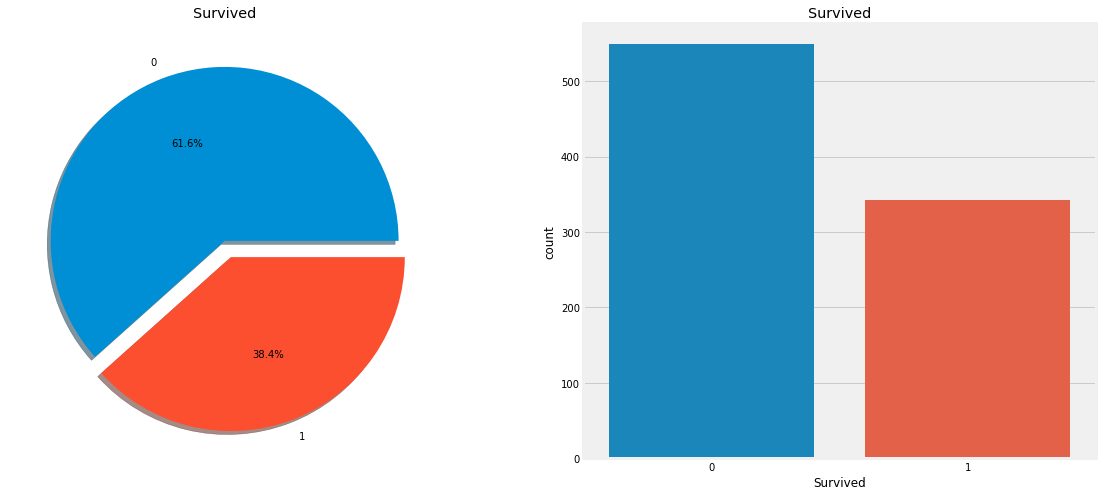

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = train, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

training 데이터를 확인한 결과, 오직 38.4%의 사람만이 생존한 사실을 알 수 있습니다.

### Types of Features
#### Categorical Features
카테고리 feature은 2개 혹은 여러개의 카테고리로 묶은 것입니다. 예를 들어 성별은 카테고리 변수 중 하나이다. 

#### Ordinal Features
서수형 (ordinal) feature은 카테고리 feature과 비슷하다. 하지만 

#### Continous Feature



연속성을 가진 feature이다.

## Features 분석하기

### Sex--> Categorical Feature

In [8]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

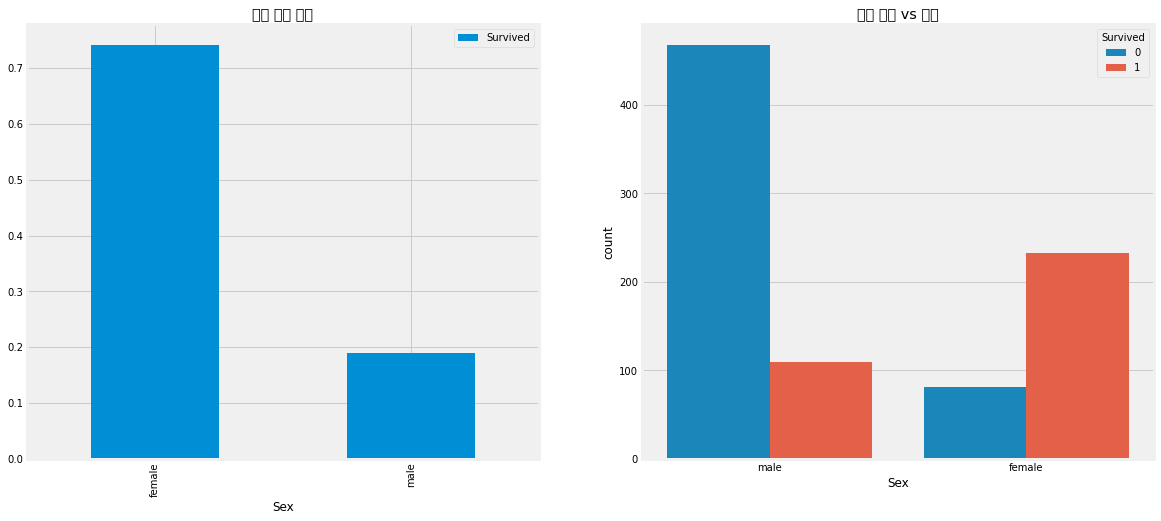

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('성별 생존 비율')
sns.countplot('Sex', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('성별 생존 vs 죽음')
plt.show()

### Pclass --> Ordinal Feature

In [10]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


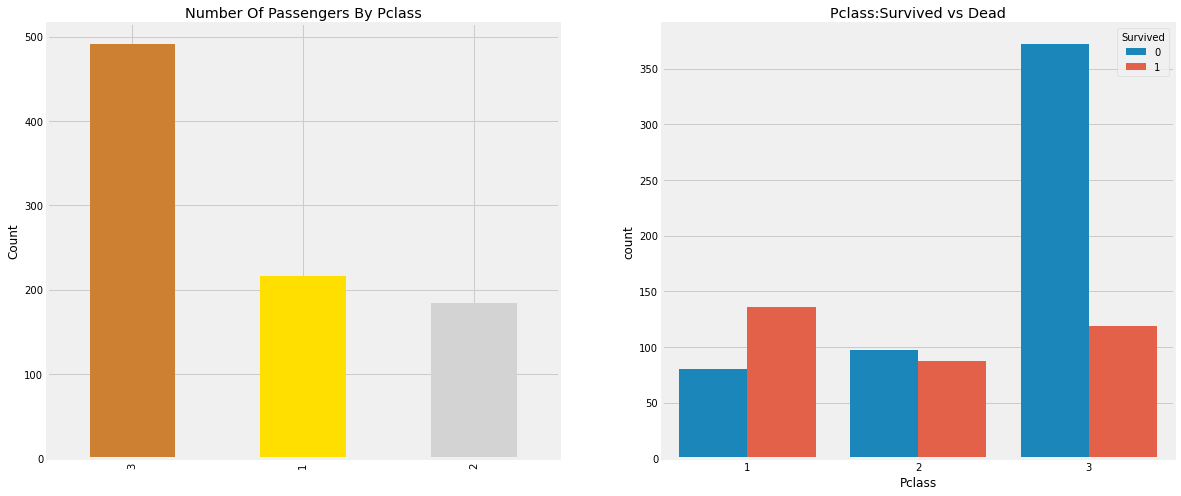

In [11]:
f,ax = plt.subplots(1,2,figsize=(18,8))

train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])

ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data = train, ax = ax[1])

ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Pclass가 3인 경우 사망 확률이 매우 높아진다.  
여성의 경우 Pclass에 따라 차이가 많이 없지만, 남성의 경우 급격히 높아지는 것을 확인할 수 있다. 

In [12]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

<function matplotlib.pyplot.show(close=None, block=None)>

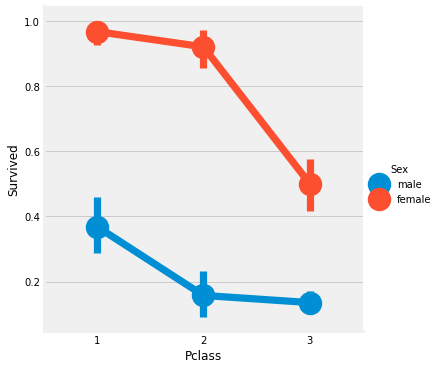

In [13]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = train)
plt.show

Pclass1의 여성인 경우 생존 확률이 95~96% 정도 된다.  
하지만 Pclass3의 남성인 경우 10%의 확률로 보인다.

### Age--> Continous Feature

In [14]:
print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


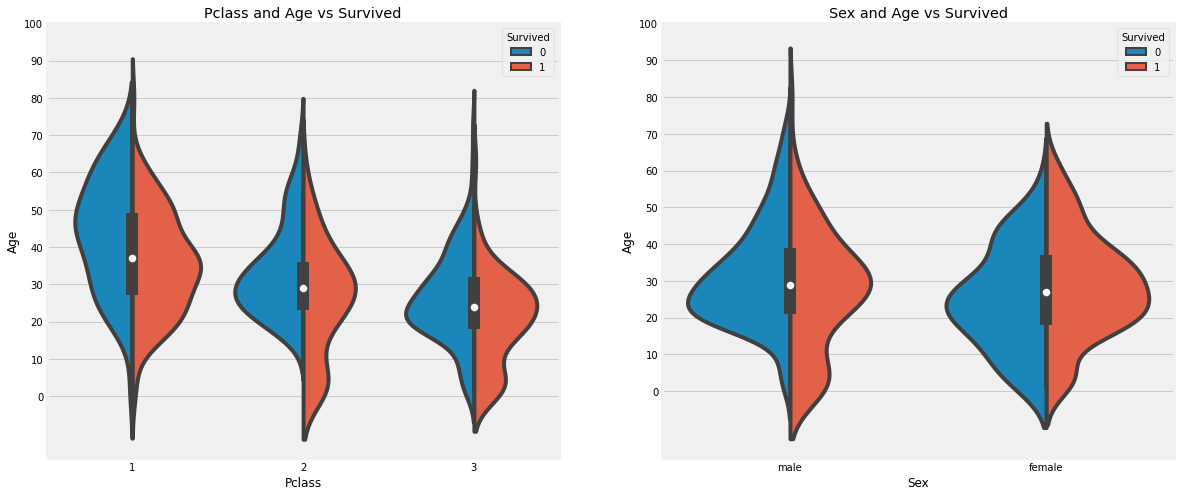

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue = 'Survived', data = train, split = True, ax = ax[0])

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data = train, split = True, ax = ax[1])

ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [16]:
train['Initial'] = 0
for i in train:
    train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')

In [17]:
train['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [18]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [34]:
is_dot = train.Name.str.extract('([A-Za-z]+)\.')
not_dot = train.Name.str.extract('([A-Za-z]+)')

A = pd.concat([is_dot, not_dot], axis = 1)
A.columns = ['is_dot', 'not_dot']
A

,is_dot,not_dot
0,Mr,Braund
1,Mrs,Cumings
2,Miss,Heikkinen
3,Mrs,Futrelle
4,Mr,Allen
...,...,...
886,Rev,Montvila
887,Miss,Graham
888,Miss,Johnston
889,Mr,Behr


([A-Za-z]+)\. <--- 여기서 \.을 추가하는 건 어떤 의미?

In [35]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


오.. 이니셜에 따라서 성별이 구분 되는구나

In [40]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], \
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [41]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


별로 개수가 없는 이니셜도 있으니까, 대표적인 이니셜로 통일 시키자

In [43]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

이니셜을 통해 나이도 대충 알 수 있으니까 신기하네

### Age 결측치 채우기 

위에서 이니셜을 통해서 나이를 알게 되었으니까 채워봅시다

In [44]:
train.loc[(train.Age.isnull()) & (train.Initial == 'Mr'), 'Age'] = 33
train.loc[(train.Age.isnull()) & (train.Initial == 'Mrs'),'Age'] = 36
train.loc[(train.Age.isnull()) & (train.Initial == 'Master'),'Age'] = 5
train.loc[(train.Age.isnull()) & (train.Initial == 'Miss'),'Age'] = 22
train.loc[(train.Age.isnull()) & (train.Initial == 'Other'),'Age'] = 46

In [45]:
train.Age.isnull().any()

False

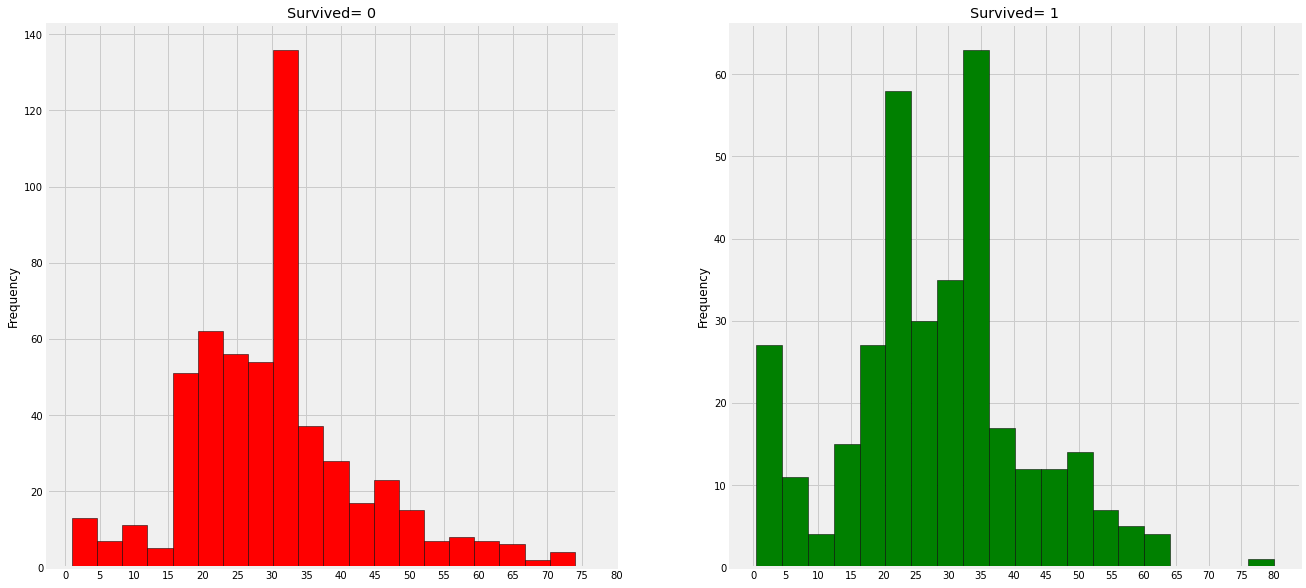

In [47]:
f, ax = plt.subplots(1,2,figsize=(20,10))

train[train['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')

ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

train[train['Survived'] == 1].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')


ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

30대의 경우 사망 인원이 매우 많았으며, 어릴 수록 생존 인원이 많았다.  
이 경우 비율로 따지면 더 좋을 것 같다.  
80대의 경우 모두 생존했다.

<function matplotlib.pyplot.show(close=None, block=None)>

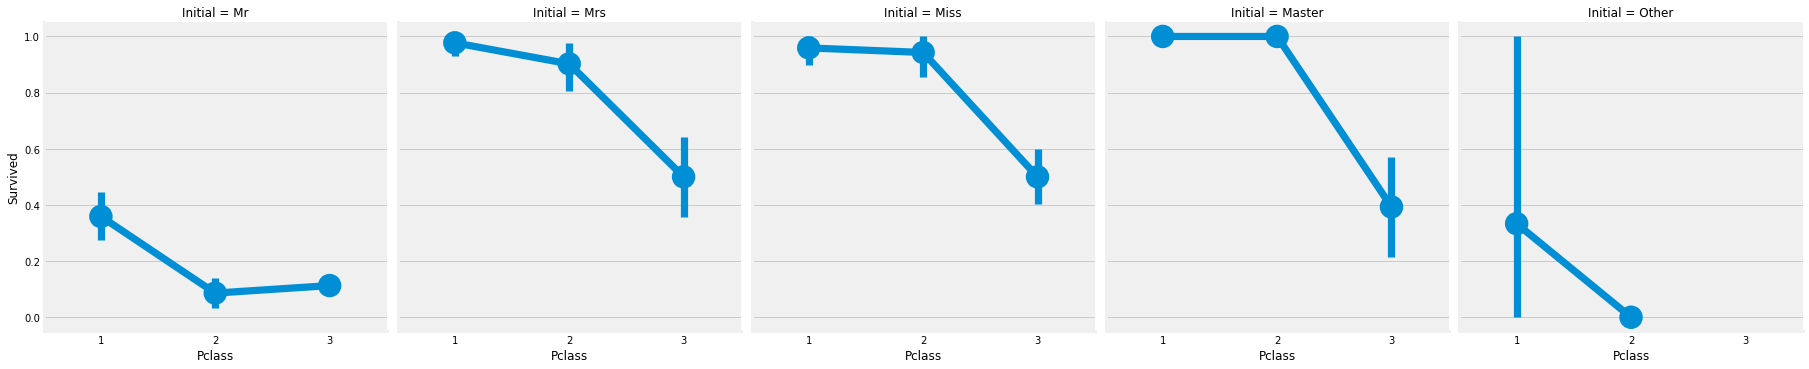

In [48]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = train)
plt.show

### Embarked--> Categorical Value

In [51]:
pd.crosstab([train.Embarked, train.Pclass], [train.Sex, train.Survived], margins = True)\
.style.background_gradient(cmap = 'summer_r')

#### Embarked 별 생존 확률

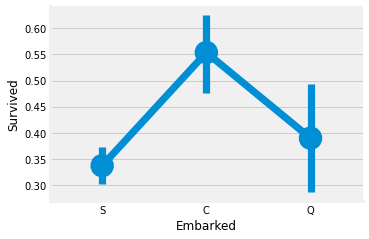

In [55]:
sns.factorplot('Embarked', 'Survived', data = train)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C에서의 생존률이 가장 높다.  
거의 55%나 되는 듯

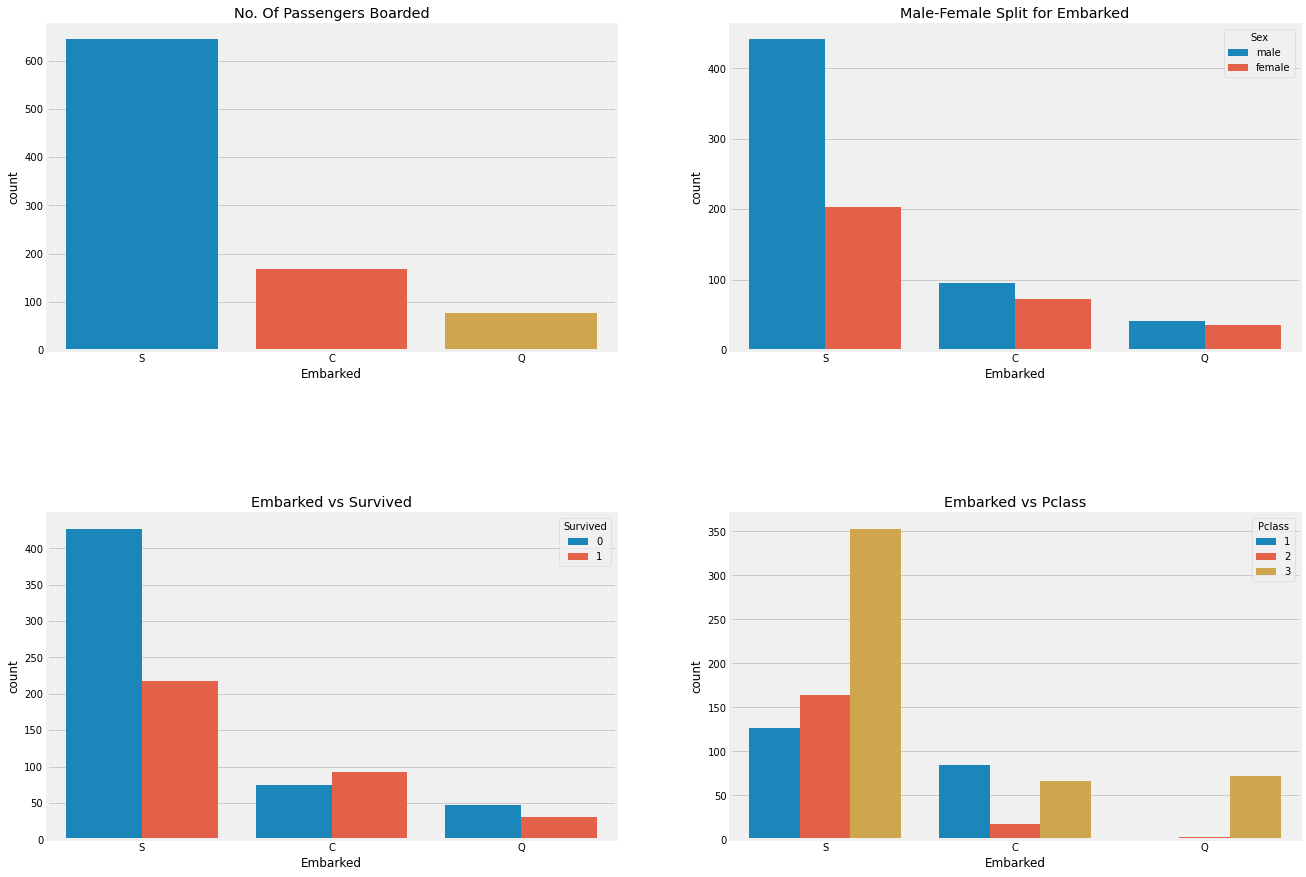

In [56]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

주로 승객들은 S에 타고 잇습니다. 그리고 Pclass3에 주로 있습니다.  
유일하게 C에 타고 있는 분들의 생존율이 좋아보입니다.  
